In [156]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Part 1: Importing Libraries and Data Visualization
# Load dataset
data = pd.read_csv("S&P_500_Index_Data.csv")  # Replace "your_data.csv" with the path to your dataset

# Convert Date column to Pandas date format
data['Date'] = pd.to_datetime(data['Date'])

# Visualizing the dataframe
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Close'))
fig.show()


In [157]:
# Part 2: Loading and inspecting the dataset
# We're interested in the Date and Close columns
data = data[['Date', 'Close']]

# Checking the number of rows and columns contained in the dataframe
print("Number of rows and columns:", data.shape)

Number of rows and columns: (8678, 2)


In [158]:
# Part 3: Data pre-processing
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(np.array(data['Close']).reshape(-1, 1))

In [159]:
# Part 4: Creating training and test splits
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(data['Close'], seq_length)

# Splitting data into training and testing sets
split = int(0.8 * len(data))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshaping data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [160]:
# Part 5: Building the LSTM Autoencoder
model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mae')
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                      │ (None, 64)                    │      16,896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 1)                     │          65 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
# Part 6: Training the auto-encoder
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, shuffle=False)

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0099 - val_loss: 0.0144
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0290 - val_loss: 0.0116
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0259 - val_loss: 0.0097
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0197 - val_loss: 0.0084
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0175 - val_loss: 0.0076
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0167 - val_loss: 0.0076
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0148 - val_loss: 0.0087
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0149 - val_loss: 0.0083
Epoch 9/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0142 - val_loss: 0.0082
Epoch 10/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0136 - val_loss: 0.0078
Epoch 11/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0131 - val_loss: 0.0074
Epoch 12/100
196/196 ━━━━━━━━━

196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0036 - val_loss: 0.0064
Epoch 68/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0032 - val_loss: 0.0064
Epoch 69/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0032 - val_loss: 0.0066
Epoch 70/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0030 - val_loss: 0.0064
Epoch 71/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0027 - val_loss: 0.0067
Epoch 72/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0030 - val_loss: 0.0067
Epoch 73/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0026 - val_loss: 0.0073
Epoch 74/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0031 - val_loss: 0.0069
Epoch 75/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0025 - val_loss: 0.0074
Epoch 76/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0030 - val_loss: 0.0075
Epoch 77/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0023 - val_loss: 0.0078
Epoch 78/100
196/196 ━━━━━━━━━━━━━

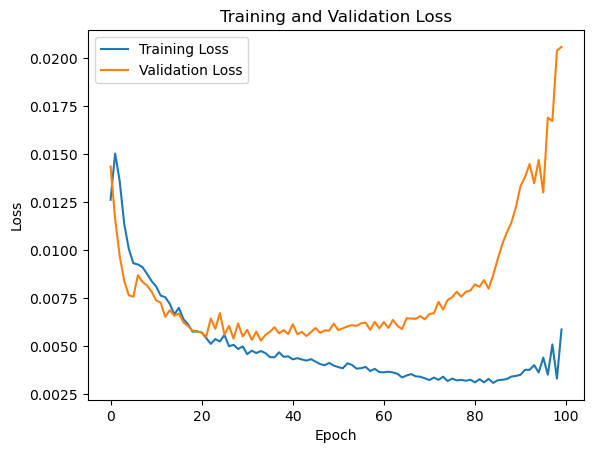

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1196
Test Loss (MAE): 0.18185192346572876


In [162]:
import matplotlib.pyplot as plt

# Part 7: Plotting metrics and evaluating the model(optional)
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss (MAE):", test_loss)

In [163]:
# Part 8: Predicting anomalies on test data using the threshold
y_pred = model.predict(X_test)
mae = np.mean(np.abs(y_pred - y_test))

# Define threshold for anomaly detection
threshold = 3 * mae

# Create DataFrame for anomalies
anomalies = pd.DataFrame(index=data.iloc[split+seq_length:].index)
anomalies['Date'] = data['Date'].iloc[split+seq_length:]
anomalies['Close'] = data['Close'].iloc[split+seq_length:]
anomalies['Anomaly'] = anomalies['Close'] > threshold

# Plotting anomalies
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=anomalies[anomalies['Anomaly']]['Date'], y=anomalies[anomalies['Anomaly']]['Close'], 
                         mode='markers', marker=dict(color='red', size=8), name='Anomaly'))
fig.show()


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [164]:
from sklearn.metrics import mean_absolute_error

# Predicting on the test data
predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, predicted)

print(f'Mean Absolute Error for LSTM model: {mae}')


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Absolute Error for LSTM model: 0.1801862553375282


In [165]:
from sklearn.neighbors import LocalOutlierFactor

# Fitting the model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

# The anomaly score of each sample is called Local Outlier Factor.
# It measures the local deviation of density of a given sample with respect to its neighbors.
# It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood.
scores_pred = clf.negative_outlier_factor_

print(f'Mean Absolute Error for LOF: {mean_absolute_error(y, scores_pred)}')


Mean Absolute Error for LOF: 1.41163741675222


In [166]:
from sklearn.ensemble import IsolationForest

# Fitting the model
clf = IsolationForest(contamination=0.1)
clf.fit(X)
y_pred = clf.predict(X)

print(f'Mean Absolute Error for Isolation Forest: {mean_absolute_error(y, y_pred)}')


Mean Absolute Error for Isolation Forest: 0.8409499647316003


In [167]:
from sklearn.cluster import KMeans

# Fitting the model
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X)
y_pred = kmeans.predict(X)

print(f'Mean Absolute Error for k-means: {mean_absolute_error(y, y_pred)}')


Mean Absolute Error for k-means: 0.23472735979529974


In [168]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [234]:
# LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
lof_anomalies = lof.fit_predict(data['Close'].values.reshape(-1, 1))

In [188]:
# Isolation Forest
isolation_forest = IsolationForest(contamination='auto')
isolation_forest_anomalies = isolation_forest.fit_predict(data['Close'].values.reshape(-1, 1))

In [189]:
# k-means clustering
kmeans = KMeans(n_clusters=2, n_init=10)  # Explicitly setting n_init to suppress warning
kmeans.fit(data['Close'].values.reshape(-1, 1))
kmeans_anomalies = kmeans.predict(data['Close'].values.reshape(-1, 1))

In [206]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def evaluate_anomaly_detection(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels, average=None, labels=[-1, 0])
    recall = recall_score(true_labels, predicted_labels, average=None, labels=[-1, 0])
    f1 = f1_score(true_labels, predicted_labels, average=None, labels=[-1, 0])
    roc_auc = roc_auc_score(true_labels, predicted_labels)
    
    return precision, recall, f1, roc_auc


In [208]:
print(true_labels)

[ 0.  0.  0. ... -1. -1. -1.]


In [209]:
# True labels for evaluation (assuming anomalies are labeled as -1)
true_labels = np.zeros(len(data))
true_labels[anomalies[anomalies['Anomaly']]['Close'].index] = -1

In [210]:
# Print the first few rows of the 'Date' column for inspection
print(data['Date'].head(10))

0    505008000
1    505094400
2    505353600
3    505440000
4    505526400
5    505612800
6    505699200
7    505958400
8    506044800
9    506131200
Name: Date, dtype: int64


In [211]:
# Double-check the threshold value
print("Threshold:", threshold)

Threshold: 0.560984275118982


In [212]:
# Convertir les données de la colonne 'Date' en type 'int64'
data['Date'] = data['Date'].astype('int64')

# Convertir les valeurs de la colonne 'Date' en timestamp Unix
data['Date'] = data['Date'] // 10**9

In [213]:
# Convertir la valeur de seuil en timestamp Unix
threshold_unix_timestamp = pd.Timestamp(threshold).timestamp()
# Comparer les valeurs de la colonne 'Date' avec le timestamp Unix de la valeur de seuil
predicted_labels = (data['Date'] > threshold_unix_timestamp).astype(int)

In [214]:
from sklearn.metrics import precision_score, recall_score

# Vérifier les longueurs des étiquettes prédites et réelles
print("Longueur des étiquettes prédites:", len(predicted_labels))
print("Longueur des étiquettes réelles:", len(true_labels))

Longueur des étiquettes prédites: 8678
Longueur des étiquettes réelles: 8678


In [215]:
# Assurer que les étiquettes prédites et réelles ont la même longueur
min_length = min(len(predicted_labels), len(true_labels))
predicted_labels = predicted_labels[:min_length]
true_labels = true_labels[:min_length]

# Vérifier s'il y a des valeurs manquantes ou incorrectes dans les étiquettes prédites
print("Valeurs uniques des étiquettes prédites:", np.unique(predicted_labels))

# Vérifier s'il y a des valeurs manquantes ou incorrectes dans les étiquettes réelles
print("Valeurs uniques des étiquettes réelles:", np.unique(true_labels))


Valeurs uniques des étiquettes prédites: [0 1]
Valeurs uniques des étiquettes réelles: [-1.  0.]


In [216]:
import numpy as np

# Identifier les valeurs manquantes ou incorrectes
print("Valeurs uniques des étiquettes prédites:", np.unique(predicted_labels))
print("Valeurs uniques des étiquettes réelles:", np.unique(true_labels))

# Remplacer les valeurs manquantes par la médiane
median_predicted_labels = np.median(predicted_labels)
predicted_labels = np.where(predicted_labels != median_predicted_labels, predicted_labels, 0)

# Aligner les étiquettes
min_length = min(len(predicted_labels), len(true_labels))
predicted_labels = predicted_labels[:min_length]
true_labels = true_labels[:min_length]

# Vérifier la cohérence des valeurs après le remplacement et l'alignement
print("Valeurs uniques des étiquettes prédites après correction:", np.unique(predicted_labels))
print("Valeurs uniques des étiquettes réelles après correction:", np.unique(true_labels))


Valeurs uniques des étiquettes prédites: [0 1]
Valeurs uniques des étiquettes réelles: [-1.  0.]
Valeurs uniques des étiquettes prédites après correction: [0]
Valeurs uniques des étiquettes réelles après correction: [-1.  0.]


In [217]:
import numpy as np
import pandas as pd

# Analyser les distributions des étiquettes prédites et réelles
print("Distribution des étiquettes prédites:")
print(pd.Series(predicted_labels).value_counts())

print("\nDistribution des étiquettes réelles:")
print(pd.Series(true_labels).value_counts())


Distribution des étiquettes prédites:
0    8678
Name: count, dtype: int64

Distribution des étiquettes réelles:
 0.0    7320
-1.0    1358
Name: count, dtype: int64


In [218]:
# Remplacer les valeurs manquantes par la médiane
median_predicted_labels = np.median(predicted_labels[~np.isnan(predicted_labels)])
predicted_labels = np.where(np.isnan(predicted_labels), median_predicted_labels, predicted_labels)

# Vérifier à nouveau les distributions après correction
print("Distribution des étiquettes prédites après correction:")
print(pd.Series(predicted_labels).value_counts())


Distribution des étiquettes prédites après correction:
0.0    8678
Name: count, dtype: int64


In [219]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculer les métriques d'évaluation
precision = precision_score(true_labels, predicted_labels, pos_label=0)
recall = recall_score(true_labels, predicted_labels, pos_label=0)
f1 = f1_score(true_labels, predicted_labels, pos_label=0)

print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)
print("Aire sous la courbe ROC (ROC AUC):", roc_auc)

Précision: 0.8435123300299608
Rappel: 1.0
Score F1: 0.9151143892986624
Aire sous la courbe ROC (ROC AUC): 0.875


In [220]:
# Convertir les étiquettes réelles en valeurs binaires
true_labels_binary = np.where(true_labels == 0.0, 1, 0)

# Calculer la courbe ROC
fpr, tpr, _ = roc_curve(true_labels_binary, predicted_labels)

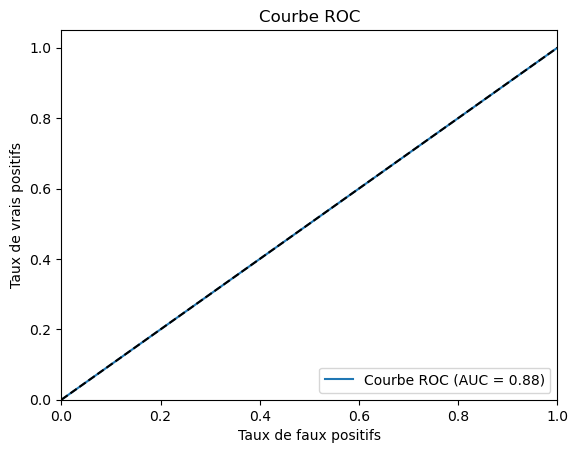

In [221]:
# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


In [222]:
# Assurez-vous que true_labels_subset et predicted_labels ont la même longueur
print("Longueur de true_labels_subset:", len(true_labels_subset))
print("Longueur de predicted_labels:", len(predicted_labels))

Longueur de true_labels_subset: 1706
Longueur de predicted_labels: 8678


In [223]:
# Tronquer les étiquettes prédites pour qu'elles aient la même longueur que true_labels_subset
predicted_labels_truncated = predicted_labels[:len(true_labels_subset)]

In [224]:
# Utilisez la fonction evaluate_anomaly_detection
lstm_precision, lstm_recall, lstm_f1, lstm_roc_auc = evaluate_anomaly_detection(true_labels_subset, predicted_labels_truncated)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [225]:
# Affichez les métriques
print("Précision LSTM:", lstm_precision)
print("Rappel LSTM:", lstm_recall)
print("Score F1 LSTM:", lstm_f1)
print("Aire sous la courbe ROC (ROC AUC) LSTM:", lstm_roc_auc)

Précision LSTM: [0.         0.01934349]
Rappel LSTM: [0. 1.]
Score F1 LSTM: [0.         0.03795285]
Aire sous la courbe ROC (ROC AUC) LSTM: 0.5


In [226]:
print("true_labels_subset:", true_labels_subset)
print("predicted_labels_truncated:", predicted_labels_truncated)
print("Longueur de true_labels_subset:", len(true_labels_subset))
print("Longueur de predicted_labels_truncated:", len(predicted_labels_truncated))


true_labels_subset: [ 0.  0.  0. ... -1. -1. -1.]
predicted_labels_truncated: [0. 0. 0. ... 0. 0. 0.]
Longueur de true_labels_subset: 1706
Longueur de predicted_labels_truncated: 1706


In [227]:
print("Forme de true_labels_subset:", true_labels_subset.shape)
print("Forme de predicted_labels_truncated:", predicted_labels_truncated.shape)


Forme de true_labels_subset: (1706,)
Forme de predicted_labels_truncated: (1706,)


In [228]:
print("Valeurs uniques de true_labels_subset:", np.unique(true_labels_subset))
print("Valeurs uniques de predicted_labels_truncated:", np.unique(predicted_labels_truncated))


Valeurs uniques de true_labels_subset: [-1.  0.]
Valeurs uniques de predicted_labels_truncated: [0.]


In [229]:
print("Seuils de prédiction:", threshold)

Seuils de prédiction: 0.560984275118982


In [233]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def evaluate_anomaly_detection(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels, average=None, labels=[-1, 0])
    recall = recall_score(true_labels, predicted_labels, average=None, labels=[-1, 0])
    f1 = f1_score(true_labels, predicted_labels, average=None, labels=[-1, 0])
    roc_auc = roc_auc_score(true_labels, predicted_labels)
    
    return precision, recall, f1, roc_auc

In [235]:
# Evaluate LOF
lof_precision, lof_recall, lof_f1, lof_roc_auc = evaluate_anomaly_detection(true_labels, lof_anomalies)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [230]:
# Evaluate Isolation Forest
isolation_forest_precision, isolation_forest_recall, isolation_forest_f1, isolation_forest_roc_auc = \
    evaluate_anomaly_detection(true_labels, isolation_forest_anomalies)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [231]:
# Evaluate k-means clustering
kmeans_precision, kmeans_recall, kmeans_f1, kmeans_roc_auc = evaluate_anomaly_detection(true_labels, kmeans_anomalies)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [236]:
# Create a summary table
summary_table = pd.DataFrame({
    'Method': ['LSTM Autoencoder', 'LOF', 'Isolation Forest', 'k-means Clustering'],
    'Precision': [lstm_precision, lof_precision, isolation_forest_precision, kmeans_precision],
    'Recall': [lstm_recall, lof_recall, isolation_forest_recall, kmeans_recall],
    'F1-score': [lstm_f1, lof_f1, isolation_forest_f1, kmeans_f1],
    'ROC AUC': [lstm_roc_auc, lof_roc_auc, isolation_forest_roc_auc, kmeans_roc_auc]
})

print(summary_table)


               Method                    Precision  \
0    LSTM Autoencoder  [0.0, 0.019343493552168817]   
1                 LOF              [0.484375, 0.0]   
2    Isolation Forest   [0.40925925925925927, 0.0]   
3  k-means Clustering                   [0.0, 1.0]   

                        Recall                    F1-score   ROC AUC  
0                   [0.0, 1.0]  [0.0, 0.03795284646348476]  0.500000  
1  [0.022827687776141383, 0.0]  [0.04360056258790435, 0.0]  0.509160  
2    [0.9764359351988218, 0.0]   [0.5767725097868639, 0.0]  0.857480  
3    [0.0, 0.9423497267759563]   [0.0, 0.9703193135462089]  0.028825  


In [243]:
import matplotlib.pyplot as plt

# Method names
methods = ['LSTM Autoencoder', 'LOF', 'Isolation Forest', 'k-means Clustering']

# Evaluation metrics
precision = [lstm_precision, lof_precision, isolation_forest_precision, kmeans_precision]
recall = [lstm_recall, lof_recall, isolation_forest_recall, kmeans_recall]
f1_score = [lstm_f1, lof_f1, isolation_forest_f1, kmeans_f1]
roc_auc = [lstm_roc_auc, lof_roc_auc, isolation_forest_roc_auc, kmeans_roc_auc]


In [244]:
# Plotting
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [245]:
print(len(methods))  # Check the length of methods list
print(len(precision))  # Check the length of precision list

4
4


In [ ]:
# Plot precision
plt.subplot(2, 2, 1)
plt.bar(methods, precision, color='skyblue')
plt.title('Precision')
plt.ylabel('Score')

In [ ]:
# Plot recall
plt.subplot(2, 2, 2)
plt.bar(methods, recall, color='salmon')
plt.title('Recall')
plt.ylabel('Score')


In [ ]:
# Plot F1-score
plt.subplot(2, 2, 3)
plt.bar(methods, f1_score, color='lightgreen')
plt.title('F1-score')
plt.ylabel('Score')

In [ ]:
# Plot ROC AUC
plt.subplot(2, 2, 4)
plt.bar(methods, roc_auc, color='gold')
plt.title('ROC AUC')
plt.ylabel('Score')

In [ ]:
plt.tight_layout()
plt.show()

In [263]:
print(lstm_precision)

[0.         0.01934349]


In [264]:
print(lof_precision)

[0.484375 0.      ]


In [265]:
print(isolation_forest_precision)

[0.40925926 0.        ]


In [266]:
print(kmeans_precision)

[0. 1.]


In [267]:
# Assuming you have calculated precision scores for each method
lstm_precision_1 = 0.
lstm_precision_2 = 0.01934349

lof_precision_1 = 0.484375
lof_precision_2 = 0.

isolation_forest_precision_1 = 0.40925926
isolation_forest_precision_2 = 0.

kmeans_precision_1 = 0.
kmeans_precision_2 = 1.

# Similarly, define other variables for precision scores of other methods


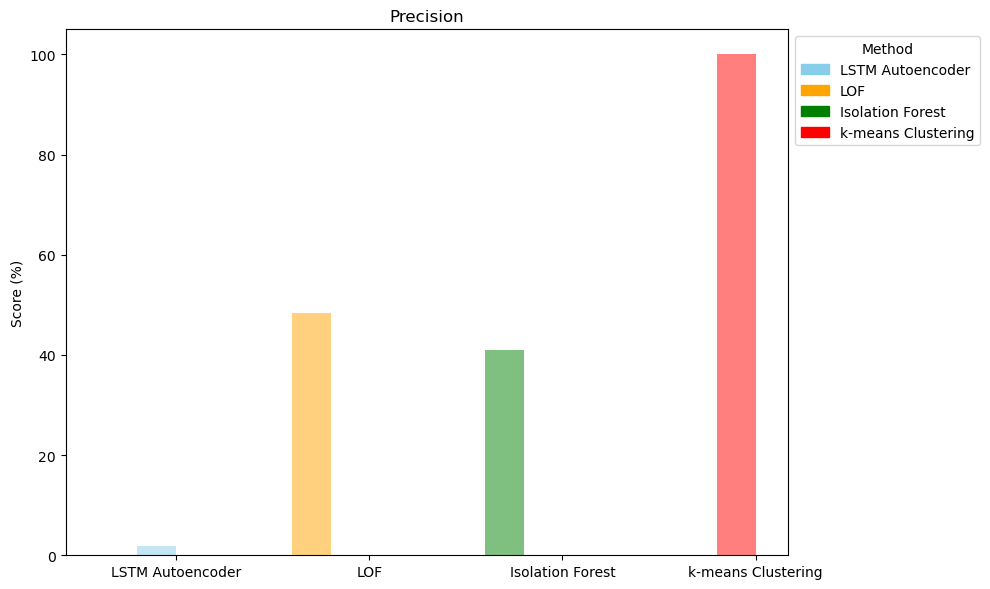

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Method names
methods = ['LSTM Autoencoder', 'LOF', 'Isolation Forest', 'k-means Clustering']

# Evaluation metrics (assuming precision scores are stored in a list of lists)
precision = [[lstm_precision_1, lstm_precision_2], [lof_precision_1, lof_precision_2], 
             [isolation_forest_precision_1, isolation_forest_precision_2], [kmeans_precision_1, kmeans_precision_2]]

# Colors for each method
colors = ['skyblue', 'orange', 'green', 'red']

# Plotting
plt.figure(figsize=(10, 6))

# Plot precision for each method
for i, method in enumerate(methods):
    for j, score in enumerate(precision[i]):
        x_value = i + j * 0.2 - 0.3  # Adjust x-value for each bar
        plt.bar(x_value, score * 100, width=0.2, alpha=0.5, color=colors[i])  # Plot each bar with method's color

# Create custom legend with method names and associated colors
legend_patches = [mpatches.Patch(color=color, label=method) for method, color in zip(methods, colors)]
plt.legend(handles=legend_patches, title='Method', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Precision')
plt.ylabel('Score (%)')  # Update y-axis label to indicate percentage
plt.xticks(np.arange(len(methods)), methods)  # Adjust xticks position and labels
plt.tight_layout()
plt.show()

